In [1]:
## Unique vs. shared estrs per tissue
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

COLORS = {
    "Artery-Aorta":"salmon",
    "Artery-Tibial": "red",
    "Adipose-Subcutaneous": "darkorange",    
    "Adipose-Visceral(Omentum)":"orange",
    "Brain-Caudate(basalganglia)":"lemonchiffon"   , 
    "Brain-Cerebellum":"yellow",
    "Cells-Transformedfibroblasts": "skyblue",
    "Esophagus-Mucosa": "sienna",
    "Esophagus-Muscularis":"burlywood",
    "Heart-LeftVentricle":"darkviolet",
    "Lung": "greenyellow",
    "Muscle-Skeletal": "mediumslateblue",
    "Nerve-Tibial":"gold",
    "Skin-NotSunExposed(Suprapubic)":"blue",
    "Skin-SunExposed(Lowerleg)":"cornflowerblue",
    "Thyroid":"green",
    "WholeBlood": "m",
    "permuted": "gray"
}

SHORTEN = {
    "WholeBlood": "Blood","Cells-Transformedfibroblasts": "Fibroblast",
    "Muscle-Skeletal": "Muscle","Artery-Tibial": "Artery",
    "Adipose-Subcutaneous": "Adipose","Lung": "Lung",
    "Esophagus-Mucosa": "Esophagus"
}

ESTRCOLS = {
    "WholeBlood":"Blood_eSTR?","Cells-Transformedfibroblasts":"Fibroblast_eSTR?", 
    "Muscle-Skeletal":"MuscleS_eSTR?","Artery-Tibial":"ArteryT_eSTR?","Lung":"Lung_eSTR?",
    "Adipose-Subcutaneous":"AdipSub_eSTR?","Esophagus-Mucosa":"Esophagus_eSTR?"}

TABLE = "/storage/szfeupe/Runs/GTEx_estr/LR_SummaryTest_Table.tsv"


In [2]:
summary = pd.read_csv(TABLE, sep='\t')
Unique = summary.loc[summary['eSTR_In_tissues']==1]
Shared = summary.loc[summary['eSTR_In_tissues']>1]

Counts={}
Counts['Counts.Tissues']=['Total.eSTRs', 'Uniq.eSTRs','Shared.eSTRs','Shared.by.5+']
for T in list(ESTRCOLS.keys()):
    K = ESTRCOLS[T]
    tot=summary.loc[summary[K]==1].shape[0]
    U = Unique.loc[Unique[K]==1].shape[0]
    S = Shared.loc[Shared[K]==1].shape[0]
    S5 = Shared.loc[(Shared[K]==1) & (Shared['eSTR_In_tissues']>=5)].shape[0] #Shared by 5 tissues or more
    Counts[SHORTEN[T]]=[tot, U, S, S5]
    #
df = pd.DataFrame.from_dict(Counts)    
df = df[['Counts.Tissues']+sorted(list(SHORTEN.values()))]
df.index = df['Counts.Tissues']
del df['Counts.Tissues']
df = df.transpose()
df

/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Counts.Tissues,Total.eSTRs,Uniq.eSTRs,Shared.eSTRs,Shared.by.5+
Adipose,356,161,195,59
Artery,503,272,231,62
Blood,630,428,202,54
Esophagus,446,248,198,56
Fibroblast,912,647,265,62
Lung,336,147,189,56
Muscle,290,158,132,43


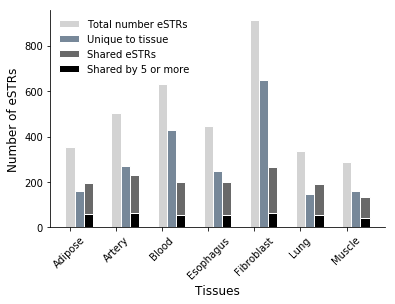

In [8]:
xvals = np.array(range(df.shape[0]))
w = 0.2
fig = plt.figure()
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
bars1 = ax.bar(xvals, df["Total.eSTRs"], color="lightgrey", edgecolor="white", width=w, label="Total number eSTRs")
bars2 = ax.bar(xvals+w, df["Uniq.eSTRs"], color="lightslategray", edgecolor="white", width=w, label="Unique to tissue")
bars3 = ax.bar(xvals+2*w, df["Shared.eSTRs"], color="dimgrey", edgecolor="white", width=w, label="Shared eSTRs")
bars4 = ax.bar(xvals+2*w, df["Shared.by.5+"], color="k", edgecolor="w", width=w, label="Shared by 5 or more") #xvals+3*w to separate the 5+

ax.set_xticks(xvals)
ax.set_xticklabels(list(df.index), size=10, rotation=45);
ax.set_ylabel("Number of eSTRs", size=12)
ax.set_yticklabels([int(x) for x in ax.get_yticks()], size=10);
ax.legend(loc="upper left", frameon=False);
ax.set_xlabel("Tissues", size=12)
plt.show()

def autolabel(bars):
    for ax in bars:
        height = ax.get_height()
        ax.text(ax.get_x() + ax.get_width()/2., 1.05*height,'%d'% int(height), ha='center', va='bottom')
